# Document Summary

The target data is displayed and the imbalance is acknowledged.

Feature Data is pre processed 4 ways to cover all combinations of lemmatization, stemmatization, CountVectorization
and RFID Vectorization.

An initial LinearRegression model shows correlation between all preprocessed data and the target data, but this correlation
is not supported by the RSquared value.

All data is resampled using RandomUndersampler and all correlation is lost.

Document concludes that further investigation should follow regularization, non linear regression modelling and consider 
classification


# Initial Regression Modelling

## Uncut data Linear regression Parameters

These values were taken from the values of the LinearRegression before the values were cut into rounded integer values, the errors here, especially the R Squared, show the amount of error produced by the values as floats. It should also be noted that in the cut process we started with min/max edges at -10/10, but there were a large number of NaN values produced which prevented the classification report from running, so these were modified to include the min max values of the series. A large amount of error could be contained there. The equations that generated these numbers have now been removed from the notebook.

| Tokenization | Vectorization | Coefficient | R Squared |
|----------|----------|----------|----------|
| Lemmatized | Count Vectorized | 0.816 | -6.49 |
| Lemmatized | TFIDF Vectorized | 0.849 | -1.40 |
| Stemmatized | Count Vectorized | 0.744 | -.98 |
| Stemmatized | TFIDF Vectorized | 0.793 | -0.35 |

Across the board it can be seen that the RSquared values are not supporting the detected regression lines.

## Linear Regression Parameters after cutting

| Data Type | Train/Test | Coefficient | R Squared | P Value | Precision | Recall | F1 | Geometric Mean |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|
| Lemmatized Count Vectorized | Train | 1.041 | 0.906 | 0.0 | 0.70 | 0.68 | 0.66 | 0.76 |
| Lemmatized Count Vectorized | Test | 0.550 | 0.484 | 0.0 | 0.33 | 0.37 | 0.33 | 0.50 |
| Lemmatized TFIDF Vectorized | Train | 1.031 | 0.921 | 0.0 | 0.71 | 0.71 | 0.69 | 0.78 |
| Lemmatized TFIDF Vectorized | Test | 0.641 | 0.549 | 0.0 | 0.35 | 0.39 | 0.35 | 0.51 |
| Stemmatized Count Vectorized | Train | 1.053 | 0.867 | 0.0 | 0.62 | 0.59 | 0.55 | 0.69 |
| Stemmatized Count Vectorized | Test | 0.670 | 0.544 | 0.0 | 0.34 | 0.35 | 0.31 | 0.49 |
| Stemmatized TFIDF Vectorized | Train | 1.035 | 0.890 | 0.0 | 0.67 | 0.64 | 0.60 | 0.72 |
| Stemmatized TFIDF Vectorized | Test | 0.755 | 0.612 | 0.0 | 0.37 | 0.39 | 0.34 | 0.52 |

Cutting the data has significantly improved the R Squared scores at the cost of the coefficient.  
The highest scoring data is the Stemmatized TFIDF Vectorized data with the highest coefficient and R Squared value across both training and test data. It scores similar to the other datasets in terms of recall, precision and f1 score and has the highest test Geometric mean by a narrow margin.

### Stemmatized TFIDF Vectorized Test Data Confusion Matrix

| Predicted Values | 1 | 2 | 3 | 4 | 5 |
|----------|----------|----------|----------|----------|----------|
| **Real Values** |  |  |  |  |  |
| **1**| 1680 | 244 | 149 | 103 | 262 |
| **2**| 1519 | 370 | 279 | 223 | 417 |
| **3**| 1004 | 381 | 508 | 622 | 1274 |
| **4**| 383 | 182 | 358 | 884 | 2615 |
| **5**| 188 | 99 | 183 | 748 | 3772 |


## Linear Regression Parameters after Under Sampling and cutting

| Data Type | Train/Test | Coefficient | R Squared | P Value | Precision | Recall | F1 | Geometric Mean |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|
| Lemmatized Count Vectorized | Train | 0.360 | 0.357 | 0.0 | 0.63 | 0.60 | 0.61 | 0.70 |
| Lemmatized Count Vectorized | Test | 0.139 | 0.150 | 2.2 | 0.39 | 0.36 | 0.37 | 0.48 |
| Lemmatized TFIDF Vectorized | Train | 0.377 | 0.367 | 0.0 | 0.63 | 0.59 | 0.59 | 0.69 |
| Lemmatized TFIDF Vectorized | Test | 0.148 | 0.157 | 1.2 | 0.36 | 0.35 | 0.35 | 0.47 |
| Stemmatized Count Vectorized | Train | 0.572 | 0.500 | 0.0 | 0.58 | 0.52 | 0.51 | 0.64 |
| Stemmatized Count Vectorized | Test | 0.350 | 0.327 | 0.0 | 0.31 | 0.33 | 0.31 | 0.47 |
| Stemmatized TFIDF Vectorized | Train | 0.643 | 0.550 | 0.0 | 0.59 | 0.52 | 0.50 | 0.64 |
| Stemmatized TFIDF Vectorized | Test | 0.429 | 0.385 | 0.0 | 0.31 | 0.34 | 0.31 | 0.48 |

Sampling with the RandomUnderSampler has had a surprisingly bad effect on the datasets. All scores have been lowered, which is a great surprise. Looking at the graph below a clear imbalance is visible with ratings 1 and 5 have the lions share of the data, so it would be expected that the resampling would improve the scores. (5 has 45.2% of the rows, 1 has 26.7%)

![Graph showing target data 'overall' Distribution](../amazon_review/images/RatingDistribution.png)

### Resampled Stemmatized TFIDF Vectorized Test Data Confusion Matrix

| Predicted Values | 1 | 2 | 3 | 4 | 5 |
|----------|----------|----------|----------|----------|----------|
| **Real Values** |  |  |  |  |  |
| **1**| 1940 | 374 | 331 | 410 | 1067 |
| **2**| 1083 | 256 | 267 | 294 | 767 |
| **3**| 795 | 274 | 370 | 512 | 1425 |
| **4**| 421 | 165 | 238 | 561 | 1880 |
| **5**| 535 | 207 | 271 | 803 | 3201 |

This indicates that the Linear Regression model is not the best fit for the data in its current state. There are options at this point. Regularisation is a good option to elimnate some of the data causing noise in the predcitions. More complex regression models can also be employed to better fit the  data. Both have the risk of overfitting the data This risk will be further assessed later in the project.

In [3]:
import sys

sys.path.append('../data_cleaning/lem_stem_functions')

from text_functions_init_ac import column_lemmatizer, column_stemmatizer, count_vectorize_data, tfidf_vectorize_data

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
# from imblearn.metrics import classification_report_imbalanced
# from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as pyplot
from scipy.stats import linregress
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
train = pd.read_csv('../../../data/processed/train.csv')
test = pd.read_csv('../../../data/processed/test.csv')

X_train = train.drop(columns='overall')
y_train = train['overall']
X_test = test.drop(columns='overall')
y_test = test['overall']


# Identify the column to be processed
X_train.info() # reviewText is the column name


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43043 entries, 0 to 43042
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vote            43043 non-null  int64 
 1   verified        43043 non-null  bool  
 2   reviewTime      43043 non-null  object
 3   reviewerID      43043 non-null  object
 4   asin            43043 non-null  object
 5   reviewerName    43043 non-null  object
 6   reviewText      43043 non-null  object
 7   summary         43043 non-null  object
 8   unixReviewTime  43043 non-null  int64 
 9   reviewYear      43043 non-null  int64 
 10  reviewMonth     43043 non-null  int64 
 11  reviewDay       43043 non-null  int64 
 12  category        43043 non-null  object
 13  description     43043 non-null  object
 14  title           43043 non-null  object
 15  brand           42533 non-null  object
 16  feature         43043 non-null  object
 17  rank            43043 non-null  object
 18  main_c

5    0.452013
1    0.267035
4    0.134377
3    0.077411
2    0.069163
Name: overall, dtype: float64

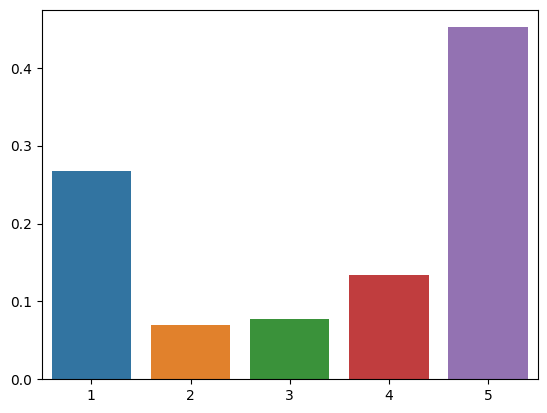

In [4]:
# y_train.info()

normalized_counts = y_train.value_counts(normalize=True)

display(y_train.value_counts(normalize=True))

sns.barplot(x=normalized_counts.index, y = normalized_counts.values);

We can see that the data is not very well balanced and may wish to consider over or undersampling the data. from the size of the data it may be best to undersample.

In [5]:
"""
With two methods of tokenizing ands 2 methods of vectorizing the text fields, that gives us 4 potential cobinations to test the regression.
To test the regression we can use the LinearRegression model to check for a linear regression and we can use the crossvalidation to verify
any detected linear relationships.

First though we must identify and preprocess our 4 types of data

This cell could take a few minutes to run.
"""

# Lemmatized data
X_lem_train = column_lemmatizer(X_train['reviewText'])
X_lem_test = column_lemmatizer(X_test['reviewText'])

# Stemmatized data
X_stem_train = column_stemmatizer(X_train['reviewText'])
X_stem_test = column_stemmatizer(X_test['reviewText'])

# Lemmatized CountVectorized data
X_lem_CV_train, X_lem_CV_test = count_vectorize_data(X_lem_train, X_lem_test)

# Lemmatized TFIDFVectorized data
X_lem_RFID_train, X_lem_RFID_test = tfidf_vectorize_data(X_lem_train, X_lem_test)

# Stemmatized CountVectorized data
X_stem_CV_train, X_stem_CV_test = count_vectorize_data(X_stem_train, X_stem_test)

# Stemmatized TFIDFVectorized data
X_stem_RFID_train, X_stem_RFID_test = tfidf_vectorize_data(X_stem_train, X_stem_test)



In [9]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model_lem_cv = LogisticRegression(max_iter=1000)
logistic_model_lem_cv.fit(X_lem_CV_train, y_train)
y_pred_logistic_lem_cv = logistic_model_lem_cv.predict(X_lem_CV_test)
logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_logistic_lem_cv = accuracy_score(y_test, y_pred_logistic_lem_cv)
print("Logistic Regression Classification Report (lem_cv):\n", logistic_report_lem_cv)
print("Confusion Matrix (lem_cv):\n", confusion_matrix_logistic_lem_cv)
print("Accuracy Score (lem_cv):", accuracy_logistic_lem_cv)

Logistic Regression Classification Report (lem_cv):
               precision    recall  f1-score   support

           1       0.69      0.76      0.72      4774
           2       0.21      0.14      0.17      1276
           3       0.26      0.18      0.21      1477
           4       0.38      0.26      0.31      2580
           5       0.73      0.84      0.78      8340

    accuracy                           0.64     18447
   macro avg       0.45      0.44      0.44     18447
weighted avg       0.60      0.64      0.61     18447

Confusion Matrix (lem_cv):
 [[3630  319  220  115  490]
 [ 595  182  144  115  240]
 [ 407  123  267  253  427]
 [ 224   99  207  678 1372]
 [ 430  133  197  615 6965]]
Accuracy Score (lem_cv): 0.6354420773025424


In [10]:
# 2. Support Vector Machine (SVM)
from sklearn.svm import SVC
svm_model_lem_cv = SVC(max_iter=1000)
svm_model_lem_cv.fit(X_lem_CV_train, y_train)
y_pred_svm_lem_cv = svm_model_lem_cv.predict(X_lem_CV_test)
svm_report_lem_cv = classification_report(y_test, y_pred_svm_lem_cv)
confusion_matrix_svm_lem_cv = confusion_matrix(y_test, y_pred_svm_lem_cv)
accuracy_svm_lem_cv = accuracy_score(y_test, y_pred_svm_lem_cv)
print("SVM Classification Report (lem_cv):\n", svm_report_lem_cv)
print("Confusion Matrix (lem_cv):\n", confusion_matrix_svm_lem_cv)
print("Accuracy Score (lem_cv):", accuracy_svm_lem_cv)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVM Classification Report (lem_cv):
               precision    recall  f1-score   support

           1       0.35      0.36      0.35      4774
           2       0.09      0.04      0.06      1276
           3       0.14      0.08      0.10      1477
           4       0.23      0.09      0.13      2580
           5       0.52      0.68      0.59      8340

    accuracy                           0.42     18447
   macro avg       0.27      0.25      0.25     18447
weighted avg       0.37      0.42      0.39     18447

Confusion Matrix (lem_cv):
 [[1730  212  205   94 2533]
 [ 443   52   82   55  644]
 [ 420   70  114   79  794]
 [ 729   64  162  242 1383]
 [1667  171  251  564 5687]]
Accuracy Score (lem_cv): 0.4241882148858893


In [6]:
# 3. K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn_model_lem_cv = KNeighborsClassifier(n_neighbors=5)
knn_model_lem_cv.fit(X_lem_CV_train, y_train)
y_pred_knn_lem_cv = knn_model_lem_cv.predict(X_lem_CV_test)
knn_report_lem_cv = classification_report(y_test, y_pred_knn_lem_cv)
confusion_matrix_knn_lem_cv = confusion_matrix(y_test, y_pred_knn_lem_cv)
accuracy_knn_lem_cv = accuracy_score(y_test, y_pred_knn_lem_cv)
print("KNN Classification Report (lem_cv):\n", knn_report_lem_cv)
print("Confusion Matrix (lem_cv):\n", confusion_matrix_knn_lem_cv)
print("Accuracy Score (lem_cv):", accuracy_knn_lem_cv)

KNN Classification Report (lem_cv):
               precision    recall  f1-score   support

           1       0.49      0.61      0.55      4774
           2       0.11      0.02      0.03      1276
           3       0.14      0.04      0.06      1477
           4       0.22      0.08      0.12      2580
           5       0.58      0.76      0.66      8340

    accuracy                           0.52     18447
   macro avg       0.31      0.30      0.28     18447
weighted avg       0.44      0.52      0.46     18447

Confusion Matrix (lem_cv):
 [[2930   59  101  158 1526]
 [ 597   24   37   71  547]
 [ 535   25   60  101  756]
 [ 517   37   83  207 1736]
 [1365   74  135  400 6366]]
Accuracy Score (lem_cv): 0.51970510110045


In [7]:
# 4. Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model_lem_cv = RandomForestClassifier(n_estimators=100)
rf_model_lem_cv.fit(X_lem_CV_train, y_train)
y_pred_rf_lem_cv = rf_model_lem_cv.predict(X_lem_CV_test)
rf_report_lem_cv = classification_report(y_test, y_pred_rf_lem_cv)
confusion_matrix_rf_lem_cv = confusion_matrix(y_test, y_pred_rf_lem_cv)
accuracy_rf_lem_cv = accuracy_score(y_test, y_pred_rf_lem_cv)
print("Random Forest Classification Report (lem_cv):\n", rf_report_lem_cv)
print("Confusion Matrix (lem_cv):\n", confusion_matrix_rf_lem_cv)
print("Accuracy Score (lem_cv):", accuracy_rf_lem_cv)

Random Forest Classification Report (lem_cv):
               precision    recall  f1-score   support

           1       0.68      0.78      0.73      4774
           2       0.78      0.01      0.03      1276
           3       0.76      0.02      0.04      1477
           4       0.54      0.03      0.05      2580
           5       0.62      0.95      0.75      8340

    accuracy                           0.64     18447
   macro avg       0.68      0.36      0.32     18447
weighted avg       0.65      0.64      0.54     18447

Confusion Matrix (lem_cv):
 [[3723    3    3    6 1039]
 [ 646   18    2    9  601]
 [ 478    1   28   28  942]
 [ 247    1    1   69 2262]
 [ 394    0    3   16 7927]]
Accuracy Score (lem_cv): 0.6377730796335448


In [8]:
# 5. Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_model_lem_cv = DecisionTreeClassifier()
tree_model_lem_cv.fit(X_lem_CV_train, y_train)
y_pred_tree_lem_cv = tree_model_lem_cv.predict(X_lem_CV_test)
tree_report_lem_cv = classification_report(y_test, y_pred_tree_lem_cv)
confusion_matrix_tree_lem_cv = confusion_matrix(y_test, y_pred_tree_lem_cv)
accuracy_tree_lem_cv = accuracy_score(y_test, y_pred_tree_lem_cv)
print("Decision Tree Classification Report (lem_cv):\n", tree_report_lem_cv)
print("Confusion Matrix (lem_cv):\n", confusion_matrix_tree_lem_cv)
print("Accuracy Score (lem_cv):", accuracy_tree_lem_cv)

Decision Tree Classification Report (lem_cv):
               precision    recall  f1-score   support

           1       0.56      0.62      0.59      4774
           2       0.14      0.11      0.12      1276
           3       0.14      0.10      0.12      1477
           4       0.24      0.23      0.24      2580
           5       0.66      0.68      0.67      8340

    accuracy                           0.52     18447
   macro avg       0.35      0.35      0.35     18447
weighted avg       0.50      0.52      0.51     18447

Confusion Matrix (lem_cv):
 [[2942  340  278  330  884]
 [ 497  137  101  165  376]
 [ 462  122  155  267  471]
 [ 403  141  209  595 1232]
 [ 918  253  386 1097 5686]]
Accuracy Score (lem_cv): 0.5158020274299344
